# Cartopy Tutorial
### Luke Colosi | lcolosi@ucsd.edu | June 29th, 2020

In this tutorial, I focus on: 
1. Establishing functions for: 
    * Creating subplots with Cartopy projection 
    * Setting latitude and longitude grid and labels
    * Creating colorbars
    * Creating subplot labels and axes labels
2. Exploring the projections and features that come with the Cartopy library. 
3. Examples

Plot figure within jupyter notebook

In [1]:
%matplotlib inline

Import libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import cmocean.cm as cmo
import cartopy.crs as ccrs #cartopy coordinate reference system 
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.feature as cfeature

Define functions for graphing

In [3]:
def set_subplots(ax, projection, resolution, lon_min, lon_max, lat_min, lat_max):
    
    """
    set_subplots(ax, projection, resolution, lon_min, lon_max, lat_min, lat_max)
    
        Function for setting longitude and latitude extent of map, mapping coastlines, and 
        continents. Many other features can be found at https://scitools.org.uk/cartopy/docs/
        v0.14/matplotlib/feature_interface.html#cartopy.feature.Feature and 
        https://www.naturalearthdata.com/features/ 
        
        Parameters 
        ----------
        ax : Geospatial axes for the subplot (cartopy object)
             ex: fig, axes = plt.subplots(3, 2, figsize=(16,12), 
                                          subplot_kw={'projection': projection})
                 ax1, ax2, ax3, ax4, ax5, ax6 = axes.flatten() 
                 ax = ax1 or ax2 or ...
        projection : Projection map 
            ex : projection = ccrs.PlateCarree(central_longitude=0.0)
        resolution : The resolution of the features in the map. Option for this argument 
                     include: resolution = '110m', '50m', '10m'. The available resolutions for
                     each feature vary. Look at natural earth website (url above) for details.
        lon_min, lon_max : minimum and maximum extent for longitude on the scale from 
                           -180 to 179 
             ex: lon_min = -180, lon_max = 179
        lat_min, lat_max : minimum and maximum extent for latitude on the scale from -90 to 89
            ex: lat_min = -66, lat_max = 66
        
              
        Returns
        -------
        plots with subplot labels on the left and top corner (or any disired location)
    
        Libraries necessary to run function
        -----------------------------------
        import cartopy.crs as ccrs
        import cartopy.feature as cfeature
    
    """
    
    import cartopy.feature as cfeature
    
    ax.set_extent([lon_min, lon_max, lat_min, lat_max], projection)
    ax.coastlines(resolution=resolution)
    ax.add_feature(cfeature.NaturalEarthFeature('physical', 'land', resolution, 
                                                facecolor = 'Gray'))
    ax.add_feature(cfeature.LAKES)
    
    return

In [4]:
def set_grid_labels(ax, projection, xticks,yticks, xgrid, ygrid, fontsize, color):
    
    """
    set_grid_labels(ax, projection, xticks,yticks, xgrid, ygrid, fontsize, color)
    
        Function for placing x and y axes tick marks for longitude and latitude respectively 
        with the following features:
            1. linewidth = 2
            2. linestyle = '--'
            3. alpha = 0.3 (transparency of lines)
            4. Longitude only on the bottom axis and latitude only on the left-side axis. 
            
        
        Parameters 
        ----------
        ax : Geospatial axes for the subplot (cartopy object)
            ex: fig, axes = plt.subplots(3, 2, figsize=(16,12),
                        subplot_kw={'projection': projection})
                ax1, ax2, ax3, ax4, ax5, ax6 = axes.flatten() 
                ax = ax1 or ax2 or ...
        projection : Projection map. For the gridlines, avoid adding arguments to the project. 
            ex : projection = ccrs.PlateCarree()
        xticks : List of longitudinal tick marks 
            ex: xticks = [0, 60, 120, 180, -120, -60]
        yticks : List of latitudinal tick marks
            ex: yticks = [-60, -30, 0, 30, 60]
        xgrid : Specifies whether to display latitude gridlines. True means latitude lines 
                are present.
            ex: xgrid = True or xgrid = False
        ygrid : Specifies whether to display longitude gridlines. True means longitude lines 
                are present.
            ex: ygrid = True or ygrid = False
        fontsize : Specifies the fontsize of the x and y tickmarks
        color : Specifies color of tickmarks and gridlines 
               
        Returns
        -------
        Plots with gridline and tick marks on the left and bottom axes 
        
        Libraries necessary to run function
        -----------------------------------
        import cartopy.crs as ccrs
        from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
        import matplotlib.pyplot as plt
        import matplotlib.ticker as mticker     
    """
    
    #import libraries
    import cartopy.crs as ccrs
    from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
    import matplotlib.ticker as mticker
    
    #Set gridlines 
    grd = ax.gridlines(crs=projection, draw_labels=True, linewidth=2, color=color, 
                       alpha=0.3, linestyle='--')
    #Disable labels on the top and right axes
    grd.xlabels_top = False 
    grd.ylabels_right = False 
    #Specify if you want labels on the bottom and left axes
    grd.xlines = xgrid
    grd.ylines = ygrid
    #Convert tickmarks to latitude and longitude
    grd.xlocator = mticker.FixedLocator(xticks)
    grd.ylocator = mticker.FixedLocator(yticks)
    grd.xformatter = LONGITUDE_FORMATTER
    grd.yformatter = LATITUDE_FORMATTER
    #Specify fontsize and color of x and y tick marks 
    grd.xlabel_style = {'size': fontsize, 'color': color}
    grd.ylabel_style = {'size': fontsize, 'color': color}
    
    #additional attributes to the grd object: 
    #gl.xpadding = -10 #vertical offset of the x axis tick marks
    #gl.ypadding = -25 #horizontal offset of the y axis tick marks
    #gl.xlocator = mticker.MaxNLocator(nbins=5,min_n_ticks=3,steps=None) #Specifies the number of x-tick marks
    #gl.ylocator = mticker.MaxNLocator(nbins=5,min_n_ticks=3,steps=None) #Specifies the number of y-tick marks
    
    return

In [5]:
def set_cbar(cs, cax, fig, orientation, extend, cbar_label, nbins, fontsize, cbar_ticks, task):
    
    """
    set_cbar(cs, cax, fig, orientation, extend, cbar_label, nbins, fontsize, cbar_ticks, task)
    
        Function for placing a color bar on a plot. Two types of colorbar labels: 
            1. Default color bar tick marks. 
            2. Customized color bar tick marks. 
        Many other color bar keyword arguments can be found at: 
        https://matplotlib.org/3.2.1/tutorials/colors/colorbar_only.html
        
        Parameters 
        ----------
        cs : Map of data on subplot axis using cartopy projection. 
            ex: cs = ax.pcolor(lon, lat, swh_phase, vmin=-np.pi, vmax=np.pi, 
                               cmap=cmo.phase, transform=projection)
        cax : Color bar axis with positioning vector of the colorbar with the folowing 
              parameters: cax = plt.axes([left, bottom, width, height]).
            ex: cax = plt.axes([.47, .17, 0.01, 0.16])
        fig : Figure object which the colorbar will attached to. 
            ex: fig, axes = plt.subplots(3, 2, figsize=(16,12), 
                                         subplot_kw={'projection': projection})
        orientation : Specifies if the color bar is vertical or horizontal. Options for 
                      keyword argument includes: orientation = 'horizontal' or 
                      orientation = 'vertical'.
        extend : Specifies whether the colorbar will have extension towards high or low 
                 values. Options include: extend = 'neither', 'both', 'min', or 'max'.
        cbar_label : Color bar label. 
            ex: cbar_label = '$m$'
        fontsize : Fontsize of color bar label and tickmarks.
            ex: fontsize = 20
        nbins : Number of tick marks on colorbar axis 
            ex: nbins = 5
        cbar_ticks : A list of tick marks that will be placed on colorbar (note that the 
                     number of tick mark labels must be equal to the number of bins on color 
                     bar)
            ex: cbar_ticks = [np.arange(-np.pi, np.pi+0.5, (np.pi + np.pi)/6).tolist(),[Jun, 
                             Aug, October, Dec, Feb, Apr, June]]
        task : Specifies whether the colorbar will need to be modified with custom tick 
               marks. Options include: task = 'custom ticks' or task = 'regular'.
              
        Returns
        -------
        Plots with colorbars in desired location and orientation.
    
        Libraries necessary to run function
        -----------------------------------
        import cartopy.crs as ccrs
        import matplotlib.pyplot as plt
        from matplotlib import ticker
    
    """
    
    #import libraries
    from matplotlib import ticker
    
    #create colorbar for plot
    if task == 'regular':
        cbar = fig.colorbar(cs, cax=cax, orientation=orientation, extend=extend)
        
        #set number of tick marks:
        tick_locator = ticker.MaxNLocator(nbins=nbins)
        cbar.locator = tick_locator 
        cbar.update_ticks()
        cbar.set_ticks(cbar.locator)
        
    elif task == 'custom ticks':
        cbar = fig.colorbar(cs, cax=cax, orientation=orientation, ticks=cbar_ticks[0], 
                            extend=extend)
    
    #case 1: vertical colorbar
    if orientation == 'vertical':
        cbar.ax.set_ylabel('%s' %cbar_label, fontsize=fontsize)
        if task == 'custom ticks':
            cbar.ax.set_yticklabels(cbar_ticks[1])
            
    #case 2: horizontal colorbar
    elif orientation == 'horizontal':
        cbar.ax.set_xlabel('%s' %cbar_label, fontsize=fontsize)
        if task == 'custom ticks':
            cbar.ax.set_xticklabels(cbar_ticks[1])
            
    #set the fontsize of colorbar tickmarks
    cbar.ax.tick_params(labelsize=fontsize) 
    
    return

In [6]:
def set_axes_label(ax, xdist_lat, ydist_lat, xdist_lon, ydist_lon, fontsize):
    
    """
    set_axes_label(ax, xdist_lat, ydist_lat, xdist_lon, ydist_lon, fontsize)
    
        Function for placing x and y axis labels for longitude and latitude respectively
        
        Parameters 
        ----------
        ax : Geospatial axes for the subplot (cartopy object)
            ex: fig, axes = plt.subplots(3, 2, figsize=(16,12), 
                                         subplot_kw={'projection': projection})
                ax1, ax2, ax3, ax4, ax5, ax6 = axes.flatten() 
                ax = ax1 or ax2 or ...
        xdist_lat : Horizontal distance for latitude label referenced from right side of 
                    figure
             ex: xdist_lat = -0.1
        ydist_lat : Vertical distance for latitude label referenced from bottom of figure 
            ex: yticks = 0.50
        xdist_lon : Horizontal distance for longitude label referenced from right side of 
                    figure 
            ex: xdist_lon = 0.5
        ydist_lon : Vertical distance for longitude label referenced from bottom of figure 
            ex: ydist_lon = -0.25
        fontsize : Fontsize of label 
        
               
        Returns
        -------
        Plots with axis labels on the left and bottom 
        
        Libraries necessary to run function
        -----------------------------------
        import cartopy.crs as ccrs
        import matplotlib.pyplot as plt    
    """
    
    ax.text(xdist_lat, ydist_lat, 'Latitude', va='bottom', ha='center',
        rotation='vertical', rotation_mode='anchor',
        transform=ax.transAxes, fontsize=fontsize)
    ax.text(xdist_lon, ydist_lon, 'Longitude', va='bottom', ha='center',
        rotation='horizontal', rotation_mode='anchor',
        transform=ax.transAxes, fontsize=fontsize)
    
    return

In [7]:
def subplot_label(ax, xdist_label, ydist_label, subplot_label, form, fs_shade, fs_main, color):
    
    """
    subplot_label(ax, xdist_label, ydist_label, subplot_label, form, fs_shade, fs_main, color)
    
        Function for placing subplot labels for figures that will be used in research papers. 
        Two types of labeling: 
            1. Shading behind letter or number. 
            2. Box behind letter or number. 
        Features of the labeling: 
            1. Black label with gray shading. 
            2. Square box with 0.8 transparency and 1 linewidth.
        
        Parameters 
        ----------
        ax : Geospatial axes for the subplot (cartopy object)
             ex: fig, axes = plt.subplots(3, 2, figsize=(16,12), 
                                          subplot_kw={'projection': projection})
                 ax1, ax2, ax3, ax4, ax5, ax6 = axes.flatten() 
                 ax = ax1 or ax2 or ...
        xdist_label : Horizontal distance for subplot label referenced from right side of 
                      figure
            ex: xdist_label = 0.2
        ydist_label : Vertical distance for subplot label referenced from bottom of figure 
             ex: ydist_label = 0.8
        subplot_label : String of words for label 
            ex: subplot_label = 'A'
        form : Specifies the format of the subplot label. Options for keyword argument: 
               form = 'box' or 'shading'. 
        fs_shade : Fontsize of shading label
            ex: fs_shade = 28
        fs_main : Fontsize of main label 
            ex: fs_main = 18
        color : Specifies color of shading. 
               
        Returns
        -------
        Plots with subplot labels in specified location
    
        Libraries necessary to run function
        -----------------------------------
        import cartopy.crs as ccrs
        import matplotlib.pyplot as plt
    """
    
    if form == 'shading': 
        ax.text(xdist_label, ydist_label, '%s' %subplot_label, va='center', ha='center', 
                transform=ax.transAxes, fontsize=fs_shade, fontweight='bold', color=color, alpha = 0.5)
        ax.text(xdist_label, ydist_label, '%s' %subplot_label, va='center', ha='center',
                transform=ax.transAxes, fontsize=fs_main, fontweight='bold')
    elif form == 'box': 
        ax.text(xdist_label, ydist_label, '%s' %subplot_label, va='center', ha='center',
                transform=ax.transAxes, fontsize=fs_main, 
                bbox = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=1, alpha=.8), 
                fontweight='bold')
    return

Example of PlateCarree projection in Cartopy with features. List of projections can be found $\href{https://scitools.org.uk/cartopy/docs/latest/crs/projections.html#cartopy-projections}{\textrm{here}}$.

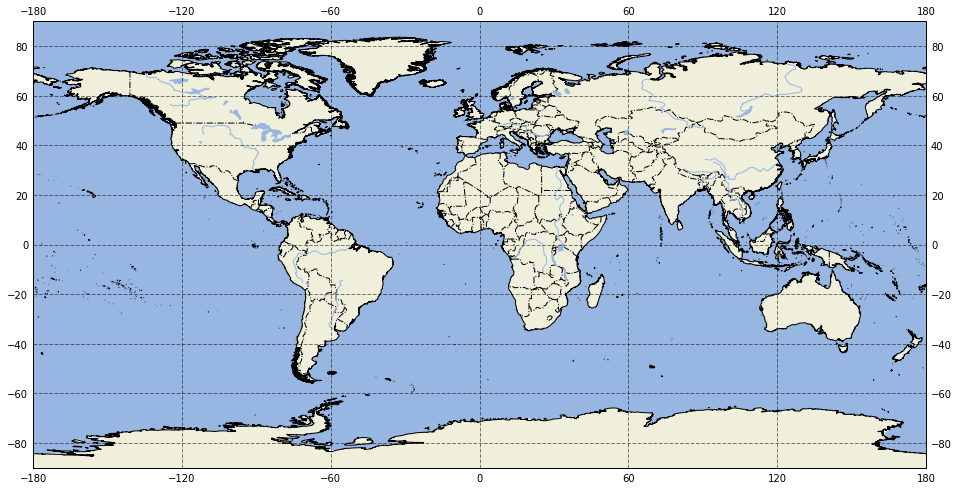

In [8]:
projection = ccrs.PlateCarree(central_longitude=0)
resolution = '10m'

fig, axes = plt.subplots(1, 1, figsize=(16,12), subplot_kw={'projection': projection}) 

######## Subplot 1 ########
axes = plt.axes(projection = ccrs.PlateCarree(central_longitude=0))


#Set extent of map
axes.set_extent([-180, 180, -90, 90], projection)

#Set features
axes.add_feature(cfeature.NaturalEarthFeature('physical', 'land', resolution, 
                                              facecolor = cfeature.COLORS['land']))
axes.add_feature(cfeature.NaturalEarthFeature('physical', 'minor_islands', resolution))
#axes.add_feature(cfeature.NaturalEarthFeature('physical', 'antarctic_ice_shelves', resolution))
axes.add_feature(cfeature.OCEAN)
axes.add_feature(cfeature.BORDERS, linestyle='-.')
axes.add_feature(cfeature.RIVERS)
axes.add_feature(cfeature.LAKES)
axes.coastlines(resolution)
axes.gridlines(crs = projection, draw_labels = True, linewidth = 1, linestyle = '--', 
               color = 'k', alpha = 0.5)


Examples of other projections. 

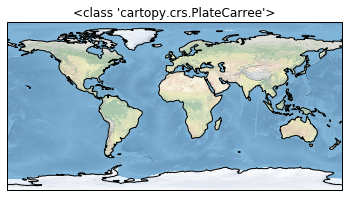

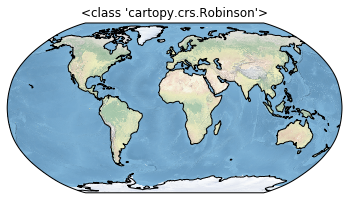

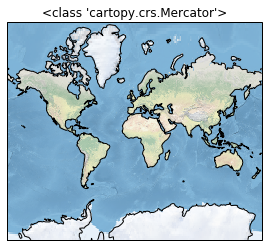

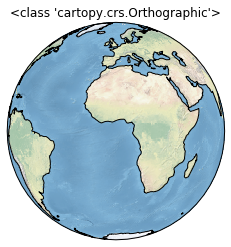

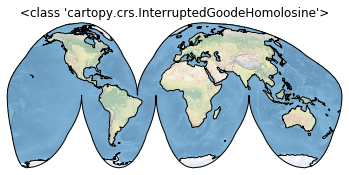

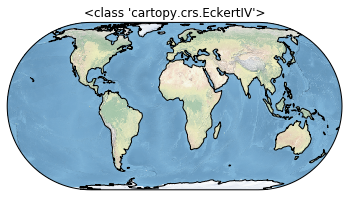

In [9]:
projections = [ccrs.PlateCarree(),
               ccrs.Robinson(),
               ccrs.Mercator(),
               ccrs.Orthographic(),
               ccrs.InterruptedGoodeHomolosine(),
               ccrs.EckertIV()]


for proj in projections:
    plt.figure()
    ax = plt.axes(projection=proj)
    ax.stock_img()
    ax.coastlines()
    ax.set_title(f'{type(proj)}')

Using the Natural Earth resource the following features are available: 
   1. **Physical features**: Land, ocean, coastlines, minor islands, Reefs, Lakes, Glaciated areas, Antarctic ice shelves, and Bathymetry  
   2. **Cultural features**: Country boundaries, populated places (capitals, cities, etc.) 
   3. **Raster**:  Land cover, shaded relief, ocean water, and drainages with lakes.

However, Http errors arise when trying to add some physical and cultural features such as minor islands, antarctic_ice_shelves, or others from the Nature earth. When the Natural earth data tries to download on your computer, the url used is incorrect and the data cannot be located. To bypass this problem, you can download these feature yourself from the Natural features $\href{https://www.naturalearthdata.com/features/}{\textrm{website}}$. To navigate this manual downloading process, follow this github $\href{https://github.com/SciTools/cartopy/issues/734}{\textrm{page}}$. Otherwise, I would just use the features: 

* axes.add_feature(cfeature.BOARDERS)
* axes.add_feature(cfeature.COASTLINES)
* axes.add_feature(cfeature.OCEAN)
* axes.add_feature(cfeature.LAKES)
* axes.add_feature(cfeature.LAND)
* axes.add_feature(cfeature.RIVERS)

Regional maps can be created by changing the arguments for the set_extent function. Note that for each projection, the arguments change which is documented $\href{https://scitools.org.uk/cartopy/docs/latest/crs/projections.html#cartopy-projections}{\textrm{here}}$.

Now, here is an example of plotting multiple subplots global maps with coastline and lakes using the functions defined above. 


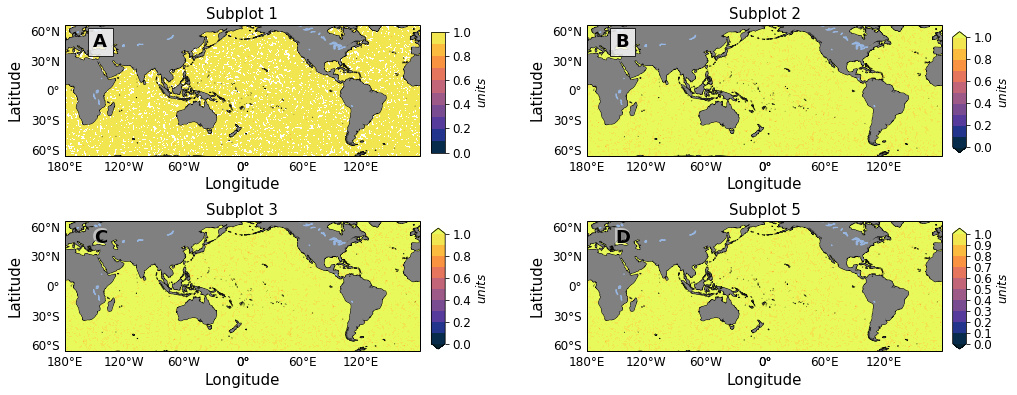

In [38]:
#Generate random data
lon,lat = np.arange(0,360+1,1), np.arange(-66,66+1,1)
data = np.random.normal(1,0.1, size = (lat.shape[0], lon.shape[0]))

#set projection and resolution
projection = ccrs.PlateCarree(central_longitude=180.0)
resolution = '50m'

#create figure and axes
fig, axes = plt.subplots(2, 2, figsize=(16,6),
                        subplot_kw={'projection': projection})
ax1, ax2, ax3, ax4 = axes.flatten()

############## Subplot 1  #################
ax1.set_title('Subplot 1', fontsize=15)
set_subplots(ax1, projection, resolution, lon_min=-180, lon_max=179, lat_min=-66, lat_max=66)
levels = np.arange(0, 1+0.1, 0.1)
cs1 = ax1.contourf(lon, lat, data, levels=levels, cmap=cmo.thermal,
                  extend='neither', transform=projection)
set_grid_labels(ax1, projection, xticks = [0, 60, 120, 180, -120, -60, -0], 
                yticks = [-60, -30, 0, 30, 60], xgrid = False, ygrid = False, fontsize=12, 
                color = 'black')
cax1 = plt.axes([.45, .585, 0.012, 0.28])
set_cbar(cs1, cax1, fig, orientation='vertical', extend = 'neither', cbar_label ='$units$', nbins = 5, 
         fontsize = 12, cbar_ticks=[], task='regular')
set_axes_label(ax1, xdist_lat = -0.12, ydist_lat = 0.50, xdist_lon = 0.5, ydist_lon = -0.28, fontsize = 15)
subplot_label(ax1, xdist_label = 0.1, ydist_label = 0.87, subplot_label = 'A', form = 'box', fs_shade = 22, fs_main = 18, color = 'w')

############## Subplot 2  #################
ax2.set_title('Subplot 2', fontsize=15)
set_subplots(ax2, projection, resolution, lon_min=-180, lon_max=179, lat_min=-66, lat_max=66)
levels = np.arange(0, 1+0.1, 0.1)
cs2 = ax2.contourf(lon, lat, data, levels=levels, cmap=cmo.thermal,
                  extend='both', transform=projection)
set_grid_labels(ax2, projection, xticks = [0, 60, 120, 180, -120, -60, -0], 
                yticks = [-60, -30, 0, 30, 60], xgrid = False, ygrid = False, fontsize=12,
                color = 'black')
cax2 = plt.axes([.9025, .585, 0.012, 0.28])
set_cbar(cs2, cax2, fig, orientation='vertical', extend = 'both', cbar_label ='$units$', nbins = 5,
         fontsize = 12, cbar_ticks=[], task='regular')
set_axes_label(ax2, xdist_lat = -0.12, ydist_lat = 0.50, xdist_lon = 0.5, ydist_lon = -0.28, fontsize = 15)
subplot_label(ax2, xdist_label = 0.1, ydist_label = 0.87, subplot_label = 'B', form = 'box', fs_shade = 22, fs_main = 18, color = 'w')

############## Subplot 3  #################
ax3.set_title('Subplot 3', fontsize=15)
set_subplots(ax3, projection, resolution, lon_min=-180, lon_max=179, lat_min=-66, lat_max=66)
levels = np.arange(0, 1+0.1, 0.1)
cs3 = ax3.contourf(lon, lat, data, levels=levels, cmap=cmo.thermal,
                  extend='both', transform=projection)
set_grid_labels(ax3, projection, xticks = [0, 60, 120, 180, -120, -60, -0], 
                yticks = [-60, -30, 0, 30, 60], xgrid = False, ygrid = False, fontsize=12,
                color = 'black')
cax3 = plt.axes([.45, .13, 0.012, 0.28])
set_cbar(cs3, cax3, fig, orientation='vertical', extend = 'both', cbar_label ='$units$', nbins = 5,
         fontsize = 12, cbar_ticks=[], task='regular')
set_axes_label(ax3, xdist_lat = -0.12, ydist_lat = 0.50, xdist_lon = 0.5, ydist_lon = -0.28, fontsize = 15)
subplot_label(ax3, xdist_label = 0.1, ydist_label = 0.87, subplot_label = 'C', form = 'shading', fs_shade = 22, fs_main = 18, color = 'w')

############## Subplot 4  #################
ax4.set_title('Subplot 5', fontsize=15)
set_subplots(ax4, projection, resolution, lon_min=-180, lon_max=179, lat_min=-66, lat_max=66)
levels = np.arange(0, 1+0.1, 0.1)
cs4 = ax4.contourf(lon, lat, data, levels=levels, cmap=cmo.thermal,
                  extend='both', transform=projection)
set_grid_labels(ax4, projection, xticks = [0, 60, 120, 180, -120, -60, -0], 
                yticks = [-60, -30, 0, 30, 60], xgrid = False, ygrid = False, fontsize=12,
                color = 'black')
cax4 = plt.axes([.9025, .13, 0.012, 0.28])
set_cbar(cs4, cax4, fig, orientation='vertical', extend = 'both', cbar_label ='$units$', nbins = 10,
         fontsize = 12, cbar_ticks=[], task='regular')
set_axes_label(ax4, xdist_lat = -0.12, ydist_lat = 0.50, xdist_lon = 0.5, ydist_lon = -0.28, fontsize = 15)
subplot_label(ax4, xdist_label = 0.1, ydist_label = 0.87, subplot_label = 'D', form = 'shading', fs_shade = 22, fs_main = 18, color = 'w')

#adjust spacing for the figure
plt.subplots_adjust(wspace = 0.41, hspace = 0.5)

#save figure 
#plt.savefig(fname = '~/example_cartopy_fig', bbox_inches = 'tight', dpi=300)

Note, for the color bar to not extend (i.e. not have the triangle at the top of the colorbar), the extend argument in the contourf function and the set_cbar function should both be set to 'neither'.

Example of plotting a specific region with a custom colorbar: 

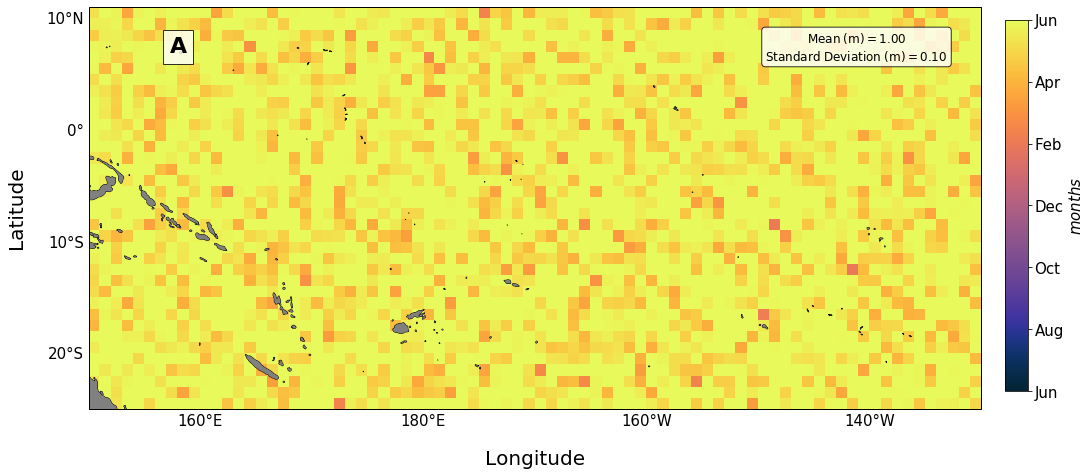

In [43]:
data = np.random.normal(1,0.1,size = (lat.shape[0], lon.shape[0]))

projection = ccrs.PlateCarree(central_longitude=180)

fig, axes = plt.subplots(1, 1, figsize=(16,12),
                        subplot_kw={'projection': projection})

set_subplots(axes, projection, resolution = '50m', lon_min=-30, lon_max=50, lat_min=-25, lat_max=11)
cs1 = axes.pcolor(lon, lat, data, vmin = 0, vmax = 1, cmap=cmo.thermal, transform=projection)
set_grid_labels(axes, projection = ccrs.PlateCarree(), xticks = [160, 180, -160, -140], yticks = [-20, -10, 0, 10], xgrid = False, ygrid = False, fontsize=15, color = 'black')
cax1 = plt.axes([.92, .29, 0.02, 0.43])
set_cbar(cs1, cax1, fig, orientation='vertical', extend = 'neither', cbar_label ='$months$', nbins = None, 
         fontsize = 15, cbar_ticks=[np.arange(0,1+(1/6),(1/6)).tolist(),['Jun', 'Aug', 'Oct', 'Dec', 'Feb', 'Apr', 'Jun']], task='custom ticks')
set_axes_label(axes, xdist_lat = -0.07, ydist_lat = 0.50, xdist_lon = 0.5, ydist_lon = -0.15, fontsize = 20)
subplot_label(axes, xdist_label = 0.1, ydist_label = 0.90, subplot_label = 'A', form = 'box', fs_shade = 28, fs_main = 22, color = 'w')

#Additional text box: 
text = '\n'.join((
    r'$\mathrm{Mean\;(m)}=%.2f$' % (1, ),
    r'$\mathrm{Standard\;Deviation \;(m)}=%.2f$' % (0.1, )))
axes.text(0.86, 0.9, text, va='center', ha='center', fontsize= 12, transform=axes.transAxes,
         bbox = dict(boxstyle="round,pad=0.3", fc="w", ec="k", lw=1, alpha=.8), fontweight='normal');

#save figure 
#plt.savefig(fname = '~/example_cartopy_fig', bbox_inches = 'tight', dpi=300)

There are a few naunces to the figure above: 

1. When you put on the gridlines to the figure above, there is a gap between $180^\circ$ E and $160^\circ$ W. This is because, the xticks specified are [160, 180, -160, -140]. To fix this you can do two things: xticks = [160, 180, -180, -160, -140] or xticks = [150, 170, -170, -150]. The first option causes $180^\circ$ E and $180^\circ$ W tick marks to overlap each other. So it is better to avoid this with the second option. 
2. Make sure the projection keyword argument in the set_grid_labels function must be the ccrs.projection_name with no specified arguments. For example, ccrs.PlateCarree(). If a central_longitude argument is specified, then the longitude tick marks will not show up on the x axis. 

### Helpful references for Cartopy documentation and resources: 
1. $\href{https://scitools.org.uk/cartopy/docs/v0.14/matplotlib/feature_interface.html#cartopy.feature.Feature}{\textrm{Cartopy feature interface}}$
2. $\href{https://scitools.org.uk/cartopy/docs/v0.14/matplotlib/geoaxes.html#cartopy.mpl.geoaxes.GeoAxes.add_feature}{\textrm{Cartopy matplotlib integration reference document}}$
3. Features in cfeature.NaturalEarthFeature found $\href{https://www.naturalearthdata.com/features/}{\textrm{here}}$.
4. Additional tutorial found $\href{https://rabernat.github.io/research_computing_2018/maps-with-cartopy.html}{\textrm{here}}$. This is very comprehensive and goes into more detail the things covered here. 
5. More Cartopy example code for plotting maps $\href{https://www.programcreek.com/python/example/95998/cartopy.crs.PlateCarree}{\textrm{here}}$.